
#### ____

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;                        SPAM Classifier - Data Science
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Guilherme Tamer Lotaif

<br>




## Introduction

This project, is the implementation of a **Naive-Bayes Classifier** for email filtering. The goal is to create a model capable of analyzing the content of a message and calculating the conditional probabilities of it being SPAM or HAM. This will enable the automatic classification of messages, contributing to the efficiency and organization of inboxes.

Bayes' theorem provides the mathematical foundation for calculating conditional probabilities, allowing us to estimate the probability of an event based on prior information. When applied to text classification, the Naive-Bayes Classifier assumes that words in a message are independent, a simplification that surprisingly proves to be effective in practice.


___

### Libraries:

In [1]:
#Importing the necessary libraries:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
import warnings

___
## 1. Import and Cleaning of Files

To achieve higher performance from the prediction algorithm, we need to: remove certain characters that won't contribute to the predictions – on the contrary, not removing them hinders the classifier's effectiveness. Another cleaning method employed is the transformation of all words to lowercase, thereby eliminating the existence of the same word in different forms.

In [2]:
#Opening the file with the emails:
df = pd.read_excel('Data/spamham2019.xlsx')

In [3]:
#Dataframe of the imported file:
df.sample(2)

,Email,Class
2220,I notice you like looking in the shit mirror y...,ham
898,"Thursday night? Yeah, sure thing, we'll work i...",ham


...

#### Implementation of the function designed for cleaning:
With the purpose of ensuring the integrity and coherence of the data.

In [4]:
#Creating the function to remove characters that hinder the classifier:
def Replacer (emails):
    #Replacing each undesirable character with a space:
    emails = emails.replace("*","")
    emails = emails.replace("!","")
    emails = emails.replace("@","")
    emails = emails.replace("#","")
    emails = emails.replace("$","")
    emails = emails.replace("%","")
    emails = emails.replace("&","")
    emails = emails.replace("-","")
    emails = emails.replace("_","")
    emails = emails.replace("+","")
    emails = emails.replace("=","")
    emails = emails.replace("'","")
    emails = emails.replace("?","")
    emails = emails.replace(";","")
    emails = emails.replace(",","")
    emails = emails.replace(".","")
    emails = emails.replace(":","")
    emails = emails.replace(")","")
    emails = emails.replace("(","")
    emails = emails.replace("/","")
    emails = emails.replace('"',"")
    emails = emails.replace("[","")
    emails = emails.replace(']',"")
    emails = emails.replace("\ ","")
    
    #Converting all characters to lowercase:
    emails = emails.lower()
    #Tokenizing the words in each email:
    emails = emails.split()

    return emails

___
## 2. Splitting the dataset into Training and Testing datasets.

The dataset should be split into two parts randomly, considering:
    
   - 75% of the data for Training;
   - 25% of the data for the Testing.

In [5]:
#Partitioning the dataframe, with 25% of the total for testing:
train, test = train_test_split(df, test_size=0.25) 

In [6]:
#Analyzing how many ham and spam emails exist in the training dataframe:
ham, spam = (train["Class"]).value_counts()
total_train = train["Class"].value_counts().sum()
print("The training dataframe has:\n","HAM: {0} Emails\n".format(ham)
                                            ,"SPAM: {0} Emails\n".format(spam),"\nTOTAL: {0}".format(ham+spam))

The training dataframe has:
 HAM: 3625 Emails
 SPAM: 554 Emails
 
TOTAL: 4179


...
#### Separating SPAM emails:

In [7]:
#Creating a list for the words in SPAM emails:
dic_SPAM = {}
#Creating the counter variable for the total number of SPAM words:
count_SPAM = 0

#Creating a loop to assign SPAM emails to a variable:
for email in train.Email[train.Class == "spam"]:
    list_SPAM = Replacer(email)
    #Creating a loop to allocate SPAM words in the dictionary:
    for word in list_SPAM:
        if word not in dic_SPAM:
            dic_SPAM[word] = 1
            count_SPAM += 1
        else:
            dic_SPAM[word] += 1
            count_SPAM += 1

In [8]:
print("Non-repeating words: {0}".format(len(dic_SPAM)),
      "\nTotal words count: {0}".format(count_SPAM))

Non-repeating words: 2586 
Total words count: 13023


#### Separating HAM emails:

In [9]:
#Creating a list for the words in HAM emails:
dic_HAM = {}
#Creating the counter variable for the total number of HAM words:
count_HAM = 0

#Creating a loop to assign HAM emails to a variable:
for email in train.Email[train.Class == "ham"]:
    list_HAM = Replacer(email)
    #Creating a loop to allocate HAM words in the dictionary:
    for word in list_HAM:
        if word not in dic_HAM:
            dic_HAM[word] = 1
            count_HAM += 1
        else:
            dic_HAM[word] += 1
            count_HAM += 1


In [10]:
print("Non-repeating words {0}".format(len(dic_HAM)),
      "\nTotal words count: {0}".format(count_HAM))

Non-repeating words 6495 
Total words count: 50679


Due to having a much larger number of HAM emails, the number of words is considerably higher, and repetition is also superior compared to SPAM emails.

...

**Total quantity of words:**

In [11]:
#Counting the quantity of words:
Total_words = count_SPAM + count_HAM
print("Total: {0} Words".format(Total_words))

Total: 63702 Words


___
## 3. Naive-Bayes classifier

The Naive-Bayes algorithm is a probabilistic classifier based on Bayes' Theorem. It utilizes the provided data to create a training and a testing partition. From the training partition, the algorithm analyzes the data, which is done independently, meaning the algorithm does not assume a dependency relationship between the factors.

...

**Before using the classifier, let's find out some probabilities::**

- The probability of a message being SPAM:<br>

    $P(SPAM)$

In [12]:
#Finding the probability based on the total number of SPAM emails and the overall total:
Pspam = spam/len(train.Email)
print("{:.2f}%".format(Pspam*100))

13.26%


- The probability of a message being HAM:

    $P(HAM)$

In [13]:
#Finding the probability based on the total number of HAM emails and the overall total:
Pham = ham/len(train.Email)
print("{:.2f}%".format(Pham*100))

86.74%


- The probability of a word occurring if the message in the training set is considered SPAM:

    $P(Word|SPAM)$

In [14]:
#Creating the function to find the probability of the word occurring given that the message is SPAM:
def P_word_spam(word):
    probability = dic_SPAM[word]/count_SPAM
    return probability

- The probability of a word occurring if the message in the training set is considered HAM:

    $P(Word|HAM)$

In [15]:
#Creating the function to find the probability of the word occurring given that the message is HAM:
def P_word_ham(word):
    probability = dic_HAM[word]/count_HAM
    return probability

...

**The classifier:** 

When we examine what the model uses to make its prediction, we see that it starts with the a priori information and the likelihood, which it discovers through the analysis of training data. With this, it makes its prediction.<br>
Por exemplo:

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Therefore, we can say:

$$P(SPAM|message)=\frac{P(message|SPAM)\cdot P(SPAM)}{P(message)}$$
<br>

Hence, as we want to determine whether the email is considered SPAM or HAM, we can divide one by the other.<br>
<br>

$$\frac {P(SPAM|message)}{P(HAM|message)}=\frac {P(message|SPAM)\cdot P(SPAM)}{P(message|HAM)\cdot P(SPAM)}$$

<br>

**Implementing this model::**<br>

**1)** First, we need to create a function to calculate the probability of the email being SPAM or HAM, based on the data obtained from the training set.

In [16]:
#Creating the function to calculate the probability of the email being SPAM or HAM:
def Probability_calculator(dictionary, word_count, message, probability_priori):
    clean_email = Replacer(message)
    probability = np.log(probability_priori)
    #Creating a loop to analyze the words in the email and how many times it appears in the dictionaries:
    for word in clean_email:
        Quantity = 1 #Initialize the count to 1 for Laplace smoothing
        if word in dictionary:
            Quantity += dictionary[word]
            #Assigning the value of the probability of SPAM or HAM to the variable "probability":
        probability += np.log(Quantity/(word_count + len(dictionary)))
    return probability



**2)** Once we have the probabilities of the email being SPAM or HAM, based on the analysis of its words by the Bayesian algorithm, we need to make a comparison between the two. For this, let's create a function that, from the probabilities calculated by the previous function, returns the most likely category for the email.

In [17]:
#Creating the function to compare the probabilities of the email being SPAM or HAM and return the most likely category:
def Probability_check(Probability_SPAM, Probability_HAM):
    if Probability_SPAM > Probability_HAM:
        #When the probability of being SPAM is higher, it returns SPAM:
        return "spam"
    elif Probability_SPAM < Probability_HAM:
        #When the probability of being HAM is higher, it returns HAM:
        return "ham"
    else:
        #When the probability of being SPAM is equal to that of being HAM, it returns "equal":
        return "="


**3)** Using the functions assembled earlier to analyze and classify an email:

In [18]:
#User input to declare an email for analysis:
message = input('Type an email: ')
#Using the function to calculate the probability of being SPAM:
Probability_SPAM = Probability_calculator(dic_SPAM, count_SPAM, message, Pspam)
#Using the function to calculate the probability of being HAM:
Probability_HAM = Probability_calculator(dic_HAM, count_HAM, message, Pham)
#Using the function to compare the two probabilities and return the result:
Result = Probability_check(Probability_SPAM, Probability_HAM)

Type an email: hello friend


In [19]:
print(Replacer(message))
print("\nThis Email is é: {0}".format(Result.upper()))

['hello', 'friend']

This Email is é: HAM


...

**Testing the classifier:**

Now that we've seen the algorithm in action, let's test it with the test set we previously separated. To do this, we'll create a new column in the dataframe with the classifier's results.

In [20]:
#Suppressing the dataframe copy warning:
pd.set_option('chained_assignment',None)

In [21]:
#Creating a list to store the results of the Naive Bayes classifier:
results_column = []
#Creating a loop to check the emails in the test set:
for test_message in test["Class"]:
    #Using the function to calculate the probability of being SPAM:
    SPAM_probability_test = Probability_calculator(dic_SPAM, count_SPAM, test_message, Pspam)
    #Using the function to calculate the probability of being HAM:
    HAM_probability_test = Probability_calculator(dic_HAM, count_HAM, test_message, Pham)
    #Adding the algorithm results to the list:
    results_column.append(Probability_check(SPAM_probability_test, HAM_probability_test))
#Assigning all the results to a new column in the test dataframe:
test['Expected'] = results_column

In [22]:
test.sample(2)

,Email,Class,Expected
228,Life is more strict than teacher... Bcoz Teach...,ham,ham
1673,Nah dub but je still buff,ham,ham


In [37]:
#Analyzing how many ham and spam emails exist in the test dataframe:
ham_test, spam_test = (test["Class"]).value_counts()
train_total = test["Class"].value_counts().sum()

#Finding out the test items:
expected_counts = test["Expected"].value_counts()

#Acquiring the value counts:
ham_expected = expected_counts.get("ham", 0)
spam_expected = expected_counts.get("spam", 0)

print("The dataframe has:\n","- HAM: {0} Emails\n".format(ham_test)
     ,"- SPAM: {0} Emails\n".format(spam_test),"\nTOTAL: {0}".format(ham_test+spam_test))

print("\nThe algorithm returns:\n - HAM: {0} Emails\n".format(ham_expected)
     ,"- SPAM {0} Emails\n".format(spam_expected),"\nTOTAL: {0}".format(ham_expected+spam_expected))

The dataframe has:
 - HAM: 1200 Emails
 - SPAM: 193 Emails
 
TOTAL: 1393

The algorithm returns:
 - HAM: 1200 Emails
 - SPAM 193 Emails
 
TOTAL: 1393


Based on numerous code executions, it is observed that in cases where the result is incorrect, it is because the code considers all emails as HAM. In the event of such occurrence, it is recommended to rerun the code and compare the obtained results.

...

**Evaluation of successes:**

In [24]:
#Creating counters for the classifier:
false_positives, true_positives, false_negatives, true_negatives = 0,0,0,0

#Creating a loop to compare the classifier results with the pre-defined classification:
for Class_test, Expected_test in zip(test["Class"], test["Expected"]):
    if Class_test == "spam" and Expected_test == "spam":
        true_positives += 1
    elif Class_test == "ham" and Expected_test == "spam":
        false_positives += 1
    elif Class_test == "spam" and Expected_test == "ham":
        false_negatives += 1
    else:
        true_negatives += 1

<br>

- **%** False positives:

In [25]:
#When the classifier claims to be SPAM but should be HAM:
print("{:.2f}%".format((false_positives/len(test))*100))

0.00%


- **%** True positives:

In [26]:
#When the classifier correctly claims to be SPAM:
print("{:.2f}%".format((true_positives/len(test))*100))

13.85%


- **%** False negatives:

In [27]:
#When the classifier claims to be HAM but should be SPAM:
print("{:.2f}%".format((false_negatives/len(test))*100))

0.00%


- **%** True negatives:

In [28]:
#When the classifier correctly claims to be HAM:
print("{:.2f}%".format(((true_negatives/len(test))*100)))

86.15%


<br>

**Is the accuracy acceptable?**<br>
To evaluate the accuracy of the algorithm, we will analyze the number of correct predictions made by our classifier and divide it by the total number of predictions.

In [29]:
#Creating a variable to sum the quantity of correct predictions:
correct = 0
#Creating a loop to compare the prediction with the existing classification:
for result_class, result_expected in zip(test["Class"],test["Expected"]):
    if result_class == result_expected:
        correct += 1

In [30]:
print("Accuracy: {:.2f}%".format(100*correct/len(test)))

Accuracy: 100.00%


### Classifier fitness:

The code written for the Naive Bayes classifier algorithm appears to be working successfully. When tested with the test set, we can see from the dataframe that the predictions are indeed matching in the majority of cases. However, with the change in the test set each time we run the code, its accuracy varies.

___
## 4. Classifier performance with training set alterations<br>
This phase is being conducted with the purpose of investigating whether a modification in the training set influences the quality of the classifier. In this context, we are reproducing the same steps already executed so far, repeating the process iteratively for 10,000 times. The goal is to obtain a substantial amount of information to conclude if there is indeed any significant change resulting from this modification.

In [33]:
# Creating a list to store accuracy rates each time the training and test sets are swapped:
Accuracy_List = []

# Creating a loop to run all necessary steps for the classifier to function 10,000 times:
for iteration in range(10000):
    # Splitting the dataframe, with 25% of the total for testing:
    training_data, test_data = train_test_split(df, test_size=0.25)

    # Analyzing the number of ham and spam emails in the training dataframe:
    ham_count, spam_count = (training_data["Class"]).value_counts()

    # Creating a list for the words in spam emails:
    dic_SPAM = {}
    # Creating a counter variable for the total number of spam words:
    spam_word_count = 0

    # Creating a loop to assign spam emails to a variable:
    for email_training in training_data.Email[training_data.Class == "spam"]:
        spam_list = Replacer(email_training)

        # Creating a loop to allocate spam words in the dictionary:
        for word in spam_list:
            if word not in dic_SPAM:
                dic_SPAM[word] = 1
                spam_word_count += 1
            else:
                dic_SPAM[word] += 1
                spam_word_count += 1

    # Creating a list for the words in ham emails:
    dic_HAM = {}
    # Creating a counter variable for the total number of ham words:
    ham_word_count = 0

    # Creating a loop to assign ham emails to a variable:
    for email_training in training_data.Email[training_data.Class == "ham"]:
        ham_list = Replacer(email_training)

        # Creating a loop to allocate ham words in the dictionary:
        for word in ham_list:
            if word not in dic_HAM:
                dic_HAM[word] = 1
                ham_word_count += 1
            else:
                dic_HAM[word] += 1
                ham_word_count += 1

    # Calculating the probability based on the total number of spam emails and the overall total:
    Pspam = spam_count / len(training_data.Email)

    # Calculating the probability based on the total number of ham emails and the overall total:
    Pham = ham_count / len(training_data.Email)

    # Creating a list to store the results of the Naive Bayes classifier:
    Result_Column = []

    # Creating a loop to check the email from the test set:
    for message in test_data["Class"]:
        # Using the function to calculate the probability of being spam:
        Probability_SPAM = Probability_calculator(dic_SPAM, spam_word_count, message, Pspam)
        # Using the function to calculate the probability of being ham:
        Probability_HAM = Probability_calculator(dic_HAM, ham_word_count, message, Pham)
        # Adding the results of the algorithm to the list:
        Result_Column.append(Probability_check(Probability_SPAM, Probability_HAM))

    # Assigning all results to a new column in the test dataframe:
    test_data['Expected'] = Result_Column

    # Creating counters for the quantities of classifier accuracies:
    True_Positives, True_Negatives = 0, 0

    # Creating a loop to compare the results of the classifier with the predefined classification:
    for Class_test, Expected_test in zip(test_data["Class"], test_data["Expected"]):
        if Class_test == "spam" and Expected_test == "spam":
            True_Positives += 1
        elif Class_test == "ham" and Expected_test == "ham":
            True_Negatives += 1

    # Allocating the accuracy rate of the classifier each time the loop runs:
    Accuracy_List.append((100 * (True_Positives + True_Negatives)) / len(test_data))


...

### 4.1 Analise dos resultados:

Dado que o código anterior executa o classificador em 10.000 conjuntos de dados distintos, esta seção é dedicada a uma análise de sua eficácia.

In [34]:
# Creating a list for values different from 100%:
list_1 = []

# Creating a loop to assign values different from 100% to the list:
for index in range(len(Accuracy_List)):
    if Accuracy_List[index] != 100:
        list_1.append(Accuracy_List[index])

In [35]:
# Creating a counter for 100% accuracy:
count_100 = 0
# Creating a counter for other accuracy values:
count_other = 0
# Loop to perform the counting:
for accuracy in Accuracy_List:
    if accuracy == 100:
        count_100 += 1
    else:
        count_other += 1
# Calculating the percentage of times when it's not 100% accuracy:
percentage_other = (count_other / (count_100 + count_other)) * 100
print("Percentage of times the classifier is less than 100% accurate:\n- {:.2f}%".format(percentage_other))

Percentage of times the classifier is less than 100% accurate:
- 25.58%




#### Generating the histogram of the frequency distribution when 100% is not achieved:

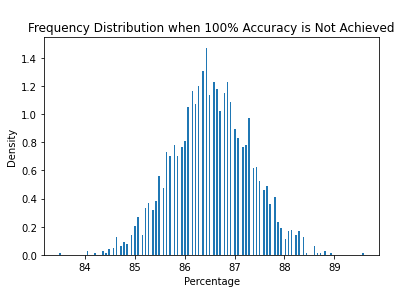

In [36]:
# Plotting the histogram of the accuracy percentage of the classifiers:
plt.hist(list_1, bins=200, density=True)
plt.title("\nFrequency Distribution when 100% Accuracy is Not Achieved")
plt.xlabel("Percentage")
plt.ylabel("Density")
plt.show()

### 4.2 Conclusion:

After running the classifier 10,000 times, notable results stand out, indicating a remarkable effectiveness of the model, achieving 100% accuracy in approximately 75% of instances. Furthermore, in cases where accuracy does not reach the maximum, there is a consistent pattern around 86/87%.

By focusing on the variability in results, an influence of the modification in the training set on the classifier's performance becomes evident. This observation reinforces the importance of the selection and quality of training data, highlighting its crucial role in the predictive capacity of the model.